In [818]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from FDApy.preprocessing.smoothing.local_polynomial import LocalPolynomial
from FDApy.representation.simulation import Brownian
import FDApy
import torch

In [819]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
realwage

Game            Game0                                             Game1       \
Player              b                        w                        b        
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed Evaluation   HR   
Time                                                                           
0               -0.42 -1.0      0.0       0.42 -1.0      0.0      -0.42 -1.0   
1               -0.42 -1.0      0.0       0.42 -1.0      0.0      -0.42  0.0   
2               -0.42 -1.0      0.0       0.42  0.0      0.0      -0.42  0.0   
3               -0.42 -1.0      0.0       0.42  0.0      0.0      -0.42  1.0   
4               -0.42 -1.0      0.0       0.42  1.0      0.0      -0.42  2.0   
...               ...  ...      ...        ...  ...      ...        ...  ...   
1184              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1185              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1186              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1187              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1188              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   

Game                            ...    Game7                           \
Player                       w  ...        b          w                 
Statistics TimeUsed Evaluation  ... TimeUsed Evaluation   HR TimeUsed   
Time                            ...                                     
0               0.0       0.42  ...      0.0       0.40 -2.0      0.0   
1               0.0       0.42  ...      0.0       0.40 -2.0      0.0   
2               0.0       0.42  ...      0.0       0.40 -1.0      0.0   
3               0.0       0.42  ...      3.0       0.45 -1.0      3.0   
4               0.0       0.42  ...      3.0       0.31  0.0      3.0   
...             ...        ...  ...      ...        ...  ...      ...   
1184            NaN        NaN  ...      NaN        NaN  NaN      NaN   
1185            NaN        NaN  ...      NaN        NaN  NaN      NaN   
1186            NaN        NaN  ...      NaN        NaN  NaN      NaN   
1187            NaN        NaN  ...      NaN        NaN  NaN      NaN   
1188            NaN        NaN  ...      NaN        NaN  NaN      NaN   

Game            Game8                                         
Player              b                        w                
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed  
Time                                                          
0               -0.30  5.0      0.0       0.30 -4.0      0.0  
1               -0.15  5.0      1.0       0.15 -2.0      1.0  
2               -0.15  2.0      1.0       0.15  0.0      1.0  
3               -0.15  2.0      1.0       0.15  1.0      1.0  
4               -0.24  2.0      1.0       0.24  1.0      1.0  
...               ...  ...      ...        ...  ...      ...  
1184              NaN  NaN      NaN        NaN  NaN      NaN  
1185              NaN  NaN      NaN        NaN  NaN      NaN  
1186              NaN  NaN      NaN        NaN  NaN      NaN  
1187              NaN  NaN      NaN        NaN  NaN      NaN  
1188              NaN  NaN      NaN        NaN  NaN      NaN  

[1189 rows x 102 columns]

In [820]:
def heart_rate_delta(dataframe, color,game):
    df = dataframe.iloc[:10]
    return np.sum(df[game][color]['HR'])//10

## Analisi bivariata con due variabili quantitative


<AxesSubplot:xlabel='HR', ylabel='Evaluation'>

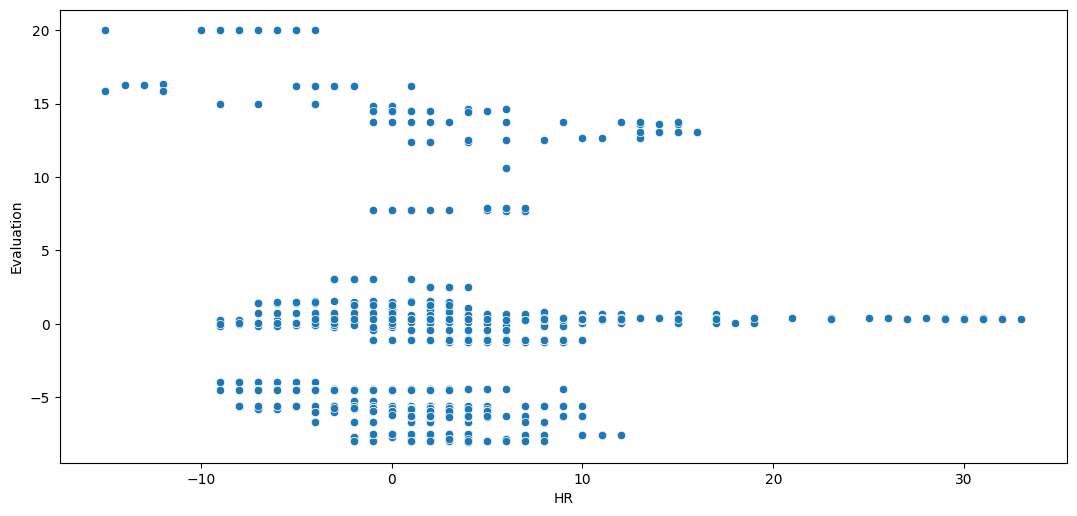

In [821]:
#diagramma a dispersione
sns.scatterplot(x=realwage['Game0']['b']['HR'], y=realwage['Game0']['b']['Evaluation'], data=realwage)


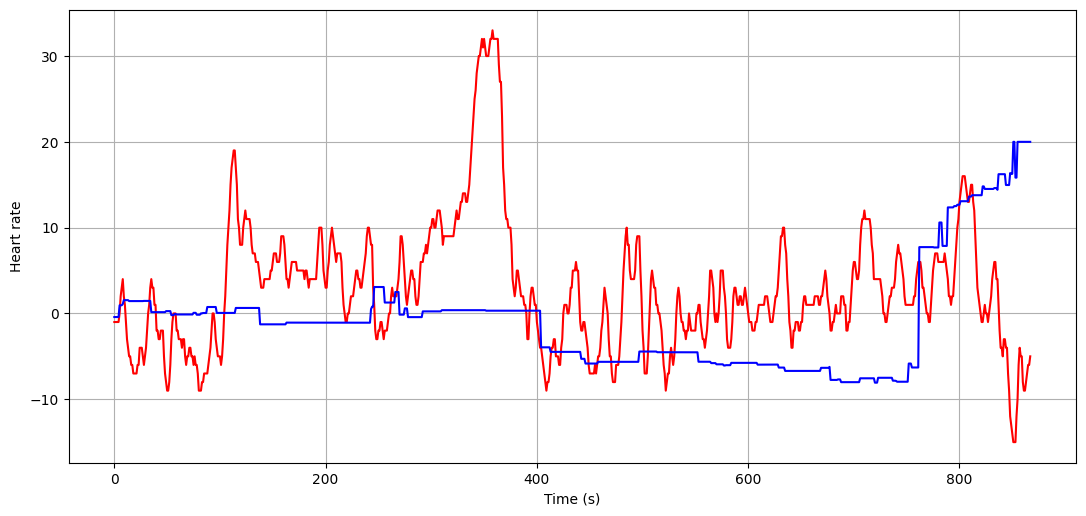

In [822]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b','Game0')


t = realwage.index
eb = realwage['Game0']['b']['Evaluation']
plt.grid()
plt.plot(t,hb, 'r')
plt.plot(t,eb,'b')
plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()


<AxesSubplot:>

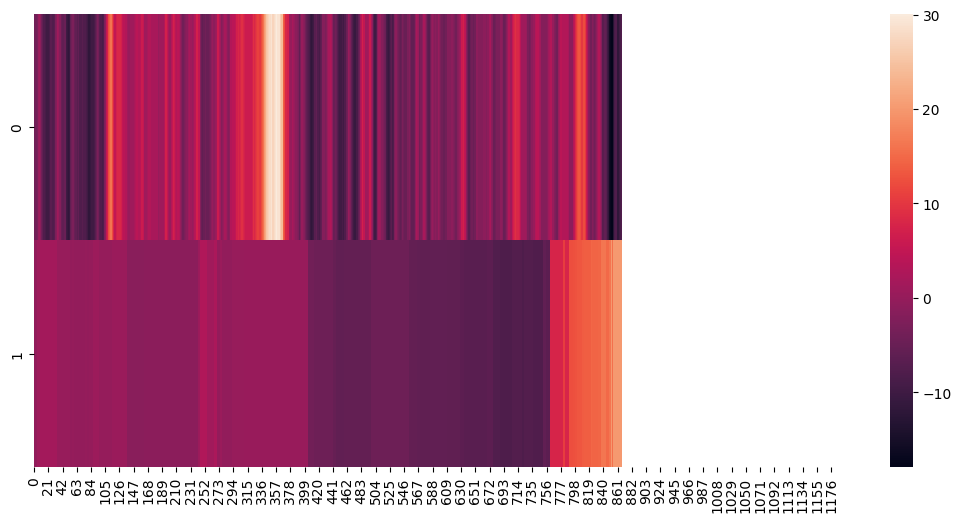

In [823]:
#heatmap or correlation matrix

hrw = realwage['Game0']['b']['HR'] - realwage['Game0']['b']['HR'].mean()
evw=realwage['Game0']['b']['Evaluation']
df = np.array([hrw,evw])
sns.heatmap(df)


In [824]:
df1 = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})
df1.corr()


,x1,x2,x3
x1,1.000000,-0.052171,0.141942
x2,-0.052171,1.000000,0.020477
x3,0.141942,0.020477,1.000000


## Multivariate Normality Test
Used to determine whether a set of multivariate observations could have come from a multivariate normal distribution.A multivariate normal distribution for m variables is characterized by m means, m variances and $ \frac{m(m-1)}{2} $ covariances or correlations and the marginal distribution of each variable is normal.

- $ H_0 $: the variables come from a Multivariate Normal Distribution
- $ H_A $: the variables don't come from a Multivariate Normal Distribution

### Henze-Zirkler Multivariate Normality Test

In [825]:
from pingouin import multivariate_normality

#create a dataset with three variables x1, x2, and x3
df = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})

#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(df, alpha=.05)



HZResults(hz=53.61430014828462, pval=6.375577236507707e-177, normal=False)

Since in the above example, the p-value is 1.2e-130 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a multivariate normal distribution.

In [826]:
test_stat_normality, p_value_normality=stats.shapiro(df)
p_value_normality


1.0

check variance homogeneity

In [827]:
test_stat_var, p_value_var= stats.levene(hb,eb)
p_value_var

nan

We reject the null hypothesis, the variances of the samples ar not the same

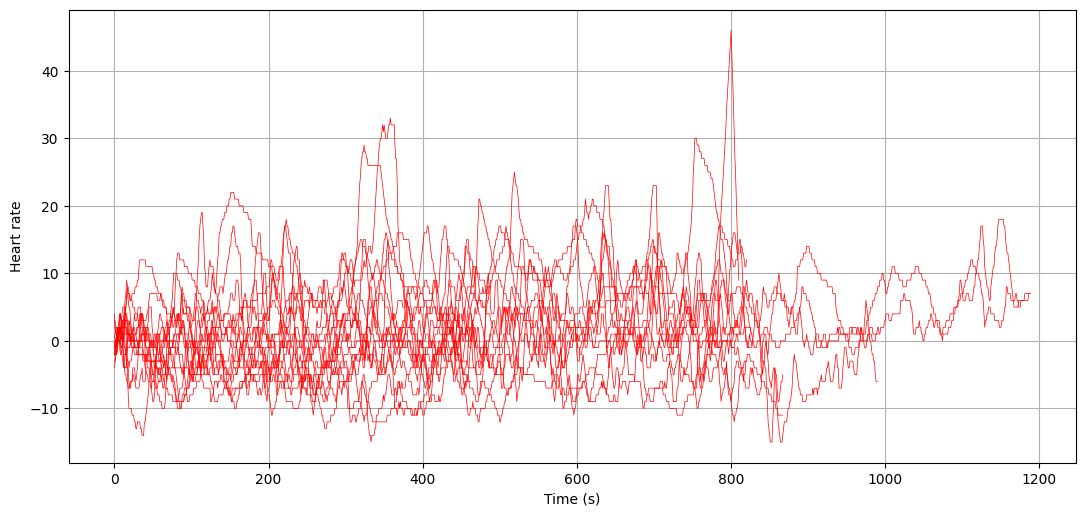

In [828]:
drealwage = pd.read_csv("prova.csv")
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb0 = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b','Game0')
hb1 = realwage['Game1']['b']['HR'] - heart_rate_delta(realwage,'b','Game1')
hb2 = realwage['Game2']['b']['HR'] - heart_rate_delta(realwage,'b','Game2')
hb3 = realwage['Game3']['b']['HR'] - heart_rate_delta(realwage,'b','Game3')
hb4 = realwage['Game4']['b']['HR'] - heart_rate_delta(realwage,'b','Game4')
hb5 = realwage['Game5']['b']['HR'] - heart_rate_delta(realwage,'b','Game5')
hb6 = realwage['Game6']['b']['HR'] - heart_rate_delta(realwage,'b','Game6')
hb7 = realwage['Game7']['b']['HR'] - heart_rate_delta(realwage,'b','Game7')

hw0 = realwage['Game0']['w']['HR'] - heart_rate_delta(realwage,'w','Game0')
hw1 = realwage['Game1']['w']['HR'] - heart_rate_delta(realwage,'w','Game1')
hw2 = realwage['Game2']['w']['HR'] - heart_rate_delta(realwage,'w','Game2')
hw3 = realwage['Game3']['w']['HR'] - heart_rate_delta(realwage,'w','Game3')
hw4 = realwage['Game4']['w']['HR'] - heart_rate_delta(realwage,'w','Game4')
hw5 = realwage['Game5']['w']['HR'] - heart_rate_delta(realwage,'w','Game5')
hw6 = realwage['Game6']['w']['HR'] - heart_rate_delta(realwage,'w','Game6')
hw7 = realwage['Game7']['w']['HR'] - heart_rate_delta(realwage,'w','Game7')

t = realwage.index

plt.grid()
plt.plot(t,hb0, 'red',linewidth=0.5)
plt.plot(t,hb1,'red',linewidth=0.5)
plt.plot(t,hb2,'red',linewidth=0.5)
plt.plot(t,hb3,'red',linewidth=0.5)
plt.plot(t,hb4,'red',linewidth=0.5)
plt.plot(t,hb5,'red',linewidth=0.5)
plt.plot(t,hb6,'red',linewidth=0.5)
plt.plot(t,hb7,'red',linewidth=0.5)

plt.plot(t,hw0, 'red',linewidth=0.5)
plt.plot(t,hw1,'red',linewidth=0.5)
plt.plot(t,hw2,'red',linewidth=0.5)
plt.plot(t,hw3,'red',linewidth=0.5)
plt.plot(t,hw4,'red',linewidth=0.5)
plt.plot(t,hw5,'red',linewidth=0.5)
plt.plot(t,hw6,'red',linewidth=0.5)
plt.plot(t,hw7,'red',linewidth=0.5)

plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()

In [829]:
X = t
Y = hb0



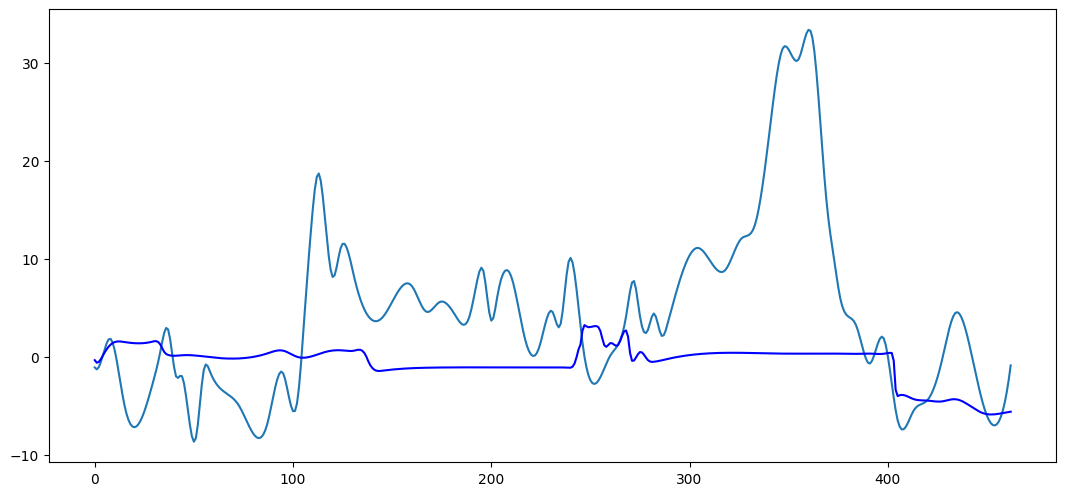

In [830]:
from scipy.interpolate import UnivariateSpline
realwage = realwage.dropna(axis=0)
hb0 = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b','Game0')
t = realwage.index
spl = UnivariateSpline(t, hb0)

eb0 = realwage['Game0']['b']['Evaluation'] 
sple = UnivariateSpline(t, eb0)
sple.set_smoothing_factor(10)
# plt.plot(t,hb0)
plt.plot(t, spl(t))
# plt.plot(t,eb0, color='orange')
plt.plot(t, sple(t),color='b')

In [831]:
# from scipy import interpolate
# realwage = realwage.dropna(axis=0)
# hb0 = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b','Game0')
# t = realwage.index
# spl = interpolate.splrep(t,hb0, k=3)

# t_new = np.linspace(min(t),max(t),464)
# hb0_smooth = interpolate.BSpline(*spl)(t_new)
# plt.plot(t,hb0, color= 'r')
# plt.plot(t_new, hb0_smooth, color = 'b')

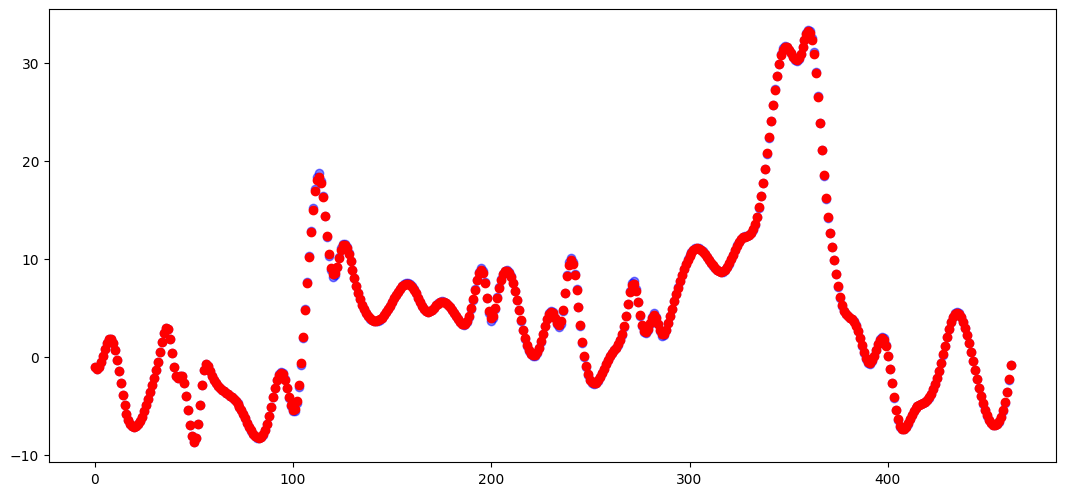

In [832]:
lp = LocalPolynomial(kernel_name="epanechnikov", bandwidth=2, degree=2)
# hb0_pred
# = np.array(hb0_pred
#.reset_index(drop=True))
hb0_pred = spl(t)
t = np.array(t)
lp.fit(t, hb0_pred)
plt.scatter(t, hb0_pred, alpha=0.5, color='blue', label='Noisy')
plt.scatter(np.sort(t), lp.X_fit_, color='red', label='Estimated')

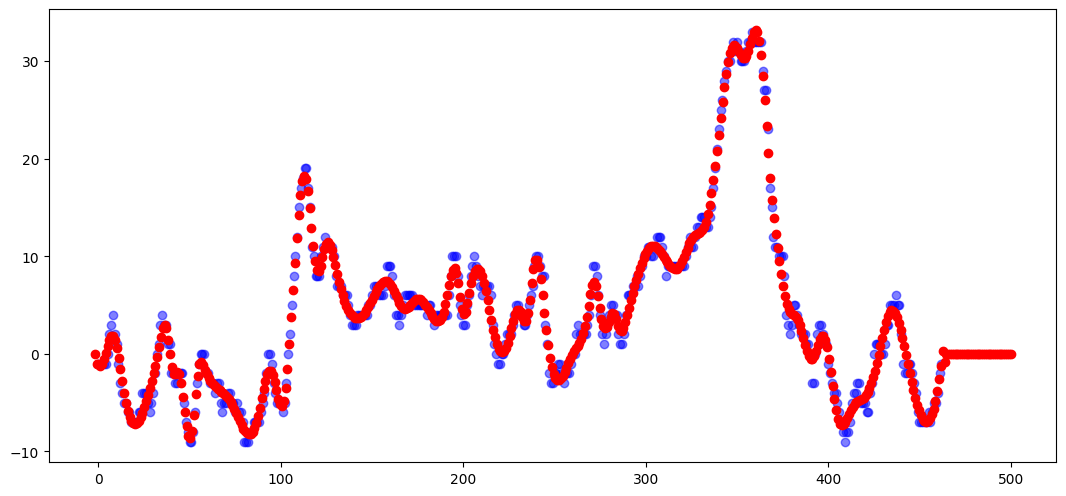

In [833]:
y_pred = lp.predict(np.linspace(-2, 500, 500))
plt.scatter(t, hb0, alpha=0.5, color='blue', label='noisy')
plt.scatter(np.linspace(-2, 500, 500), y_pred, color='red', label='Prediction')

In [837]:
realwage = realwage.dropna(axis=1)
X = pd.DataFrame({'x1':t,
                   'x2': hb0})
X = np.array([t,hb0])
X0 = np.mgrid[-700:700:5, -50:50:5] 
X0 = np.vstack([X0[0].ravel(), X0[1].ravel()])              
Y = realwage['Game0']['b']['Evaluation']
Y = np.array(Y)

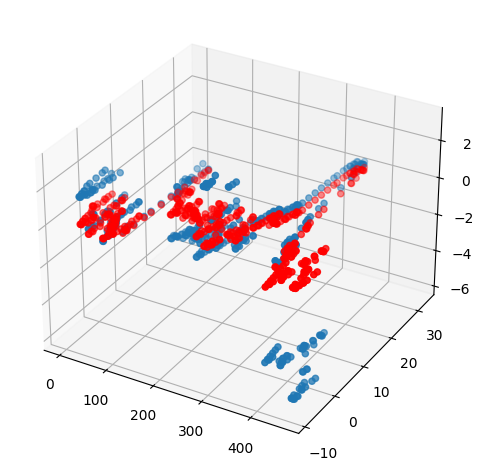

In [838]:
# Fit local polynomials
lp = LocalPolynomial(kernel_name="epanechnikov", bandwidth=2, degree=1)
lp.fit(X, Y)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(X[0], X[1], Y)
_ = ax.scatter(X[0], X[1], lp.X_fit_, color='red')

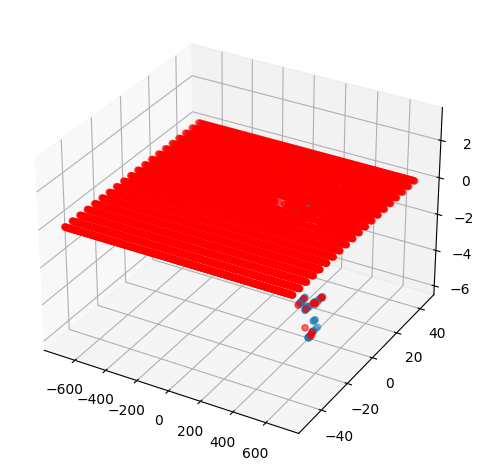

In [839]:
y_pred = lp.predict(X0)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(X[0], X[1], Y)
_ = ax.scatter(X0[0], X0[1], y_pred, color='red')